
<center><b><h1>Machine Learning - 2301CS621</b></center>
<center><b><h1>Bhagiya Vidisha</b></center>    
    <center><b><h1>Preprocessing data</b></center>    

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cardio_train.csv' , sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# preprocess the data

## convert age days to years
df['age'] = (df['age'] / 365).astype(int)

In [8]:
#calculate BMI
df['bmi'] = df['weight'] / ((df['height']/100) ** 2)
df[['bmi' , 'weight' , 'height']]

,bmi,weight,height
0,21.967120,62.0,168
1,34.927679,85.0,156
2,23.507805,64.0,165
3,28.710479,82.0,169
4,23.011177,56.0,156
...,...,...,...
69995,26.927438,76.0,168
69996,50.472681,126.0,158
69997,31.353579,105.0,183
69998,27.099251,72.0,163


In [9]:
df.drop('id',axis=1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [10]:
df = df[(df['ap_hi'] > 50) & (df['ap_lo'] < 250)]
df = df[(df['ap_lo'] > 30) & (df['ap_lo'] < 200)]

df.shape

(68808, 14)

In [11]:
df = df[(df['bmi'] > 10) & (df['bmi'] < 60)]


In [12]:
df = df[df['ap_hi'] >= df['ap_lo']]

df.shape

(68640, 14)

In [13]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [14]:
df['active'].value_counts()

active
1    55142
0    13498
Name: count, dtype: int64

In [15]:
df['cardio'].value_counts()

cardio
0    34674
1    33966
Name: count, dtype: int64

In [16]:
corr_matrix = df.corr()
corr_matrix

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,1.000000,0.003978,0.003172,-0.003337,-0.001652,0.003211,-0.000149,0.005809,0.002206,-0.003794,0.000553,0.003413,0.003812,-0.000115
age,0.003978,1.000000,-0.023221,-0.084829,0.055201,0.020594,0.156430,0.154882,0.098600,-0.047620,-0.028762,-0.010387,0.239230,0.102396
gender,0.003172,-0.023221,1.000000,0.514323,0.157909,0.005930,0.067638,-0.036747,-0.021117,0.338753,0.171095,0.006016,0.007364,-0.110003
height,-0.003337,-0.084829,0.514323,1.000000,0.310343,0.005800,0.037588,-0.054004,-0.020612,0.194164,0.097575,-0.008460,-0.011720,-0.210043
weight,-0.001652,0.055201,0.157909,0.310343,1.000000,0.030131,0.254406,0.142296,0.107725,0.067469,0.067850,-0.018499,0.180951,0.858283
ap_hi,0.003211,0.020594,0.005930,0.005800,0.030131,1.000000,0.081290,0.022996,0.011799,-0.001223,0.001577,-0.000669,0.053514,0.028212
ap_lo,-0.000149,0.156430,0.067638,0.037588,0.254406,0.081290,1.000000,0.161275,0.074702,0.025099,0.037090,-0.000647,0.340012,0.240692
cholesterol,0.005809,0.154882,-0.036747,-0.054004,0.142296,0.022996,0.161275,1.000000,0.450654,0.009869,0.035270,0.008772,0.221410,0.172693
gluc,0.002206,0.098600,-0.021117,-0.020612,0.107725,0.011799,0.074702,0.450654,1.000000,-0.005824,0.010360,-0.007895,0.089581,0.120031
smoke,-0.003794,-0.047620,0.338753,0.194164,0.067469,-0.001223,0.025099,0.009869,-0.005824,1.000000,0.340023,0.025211,-0.016297,-0.033740


In [17]:
import seaborn as sb
import matplotlib.pyplot as plt

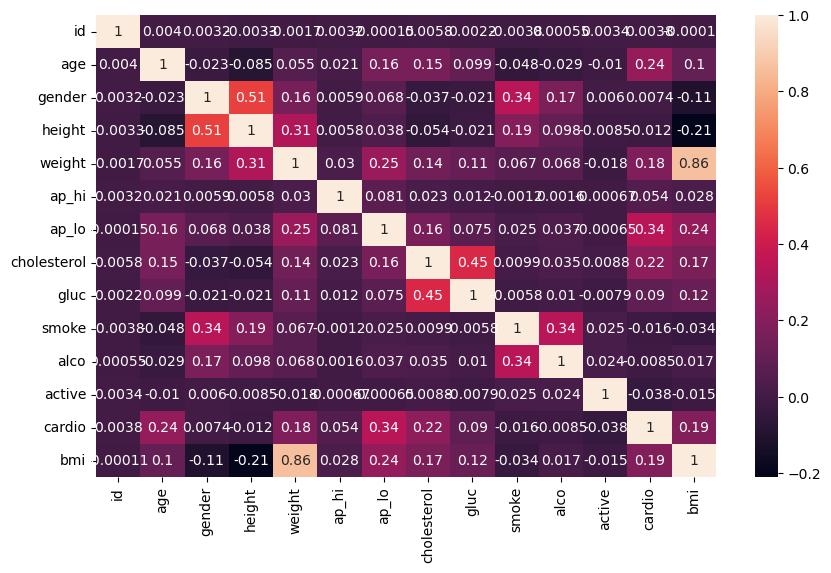

In [18]:
corr_matrix = df.corr() 
plt.figure(figsize=(10,6))
sb.heatmap(corr_matrix, annot=True)
plt.show()

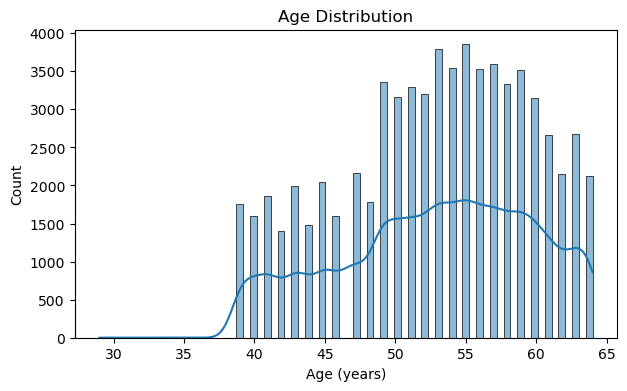

In [19]:
plt.figure(figsize=(7,4))
sb.histplot(df['age'],kde=True)
plt.title("Age Distribution")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

In [20]:
df.groupby('gender')[['ap_hi','ap_lo']].mean()

,ap_hi,ap_lo
gender,,
1,128.106603,80.838396
2,130.037439,82.180344


In [21]:
df.groupby('gender')['cardio'].sum()

gender
1    22003
2    11963
Name: cardio, dtype: int64

## Cardio percentage by smoking status

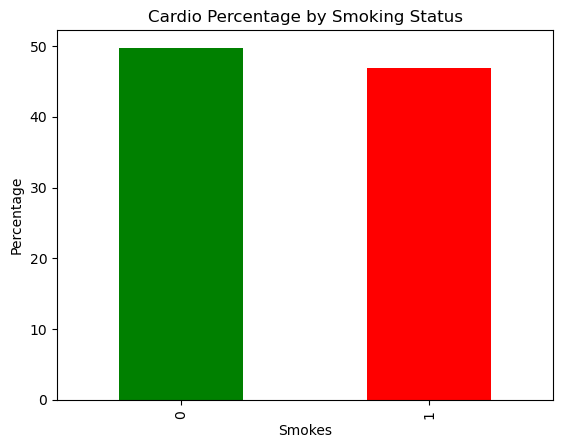

In [22]:
group = df.groupby('smoke')['cardio'].mean() * 100
group.plot(kind='bar', color=['green','red'])
plt.title("Cardio Percentage by Smoking Status")
plt.ylabel("Percentage")
plt.xlabel("Smokes")
plt.show()

In [23]:
# 0 for female and 1 for male
df['gender'] = df['gender'].replace({1:0,2:1})

In [24]:
df['gender'].value_counts()

gender
0    44708
1    23932
Name: count, dtype: int64

## Find and remove duplicates

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
print(df.duplicated().sum())

0


## Calculate Pluse Pressure

In [27]:
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df[['pulse_pressure']]

,pulse_pressure
0,30
1,50
2,60
3,50
4,40
...,...
69995,40
69996,50
69997,90
69998,55


## Clean Height and Weight Outliers

In [28]:
df = df[(df['height'] >= 130) & (df['height'] <= 210)]
df = df[(df['weight'] >= 40) & (df['weight'] <= 180)]

df[['height' , 'weight']]

,height,weight
0,168,62.0
1,156,85.0
2,165,64.0
3,169,82.0
4,156,56.0
...,...,...
69995,168,76.0
69996,158,126.0
69997,183,105.0
69998,163,72.0


In [29]:
final_features = [
    'age', 'gender', 'height', 'weight', 'bmi',
    'ap_hi', 'ap_lo', 
    'cholesterol', 'gluc', 'smoke', 'alco', 'active' , 'pulse_pressure'
]

df_final = df[final_features + ['cardio']]
df_final.head()


,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,pulse_pressure,cardio
0,50,1,168,62.0,21.967120,110,80,1,1,0,0,1,30,0
1,55,0,156,85.0,34.927679,140,90,3,1,0,0,1,50,1
2,51,0,165,64.0,23.507805,130,70,3,1,0,0,0,60,1
3,48,1,169,82.0,28.710479,150,100,1,1,0,0,1,50,1
4,47,0,156,56.0,23.011177,100,60,1,1,0,0,0,40,0


In [30]:
import os

In [31]:
path = './data/'
df_final.to_csv(path + "cardio_processed_data.csv" , index = False)
print("dataset saved at:", path)

dataset saved at: ./data/


NameError: name 'RandomForestClassifier' is not defined